In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [11]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [12]:
noise = np.random.randn(len(x_data))

In [13]:
y_true = (0.5 * x_data) + 5 + noise

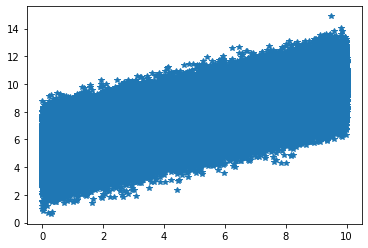

In [14]:
plt.plot(x_data, y_true, '*')

In [15]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [16]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [17]:
my_data = pd.concat([x_df, y_df], axis=1)

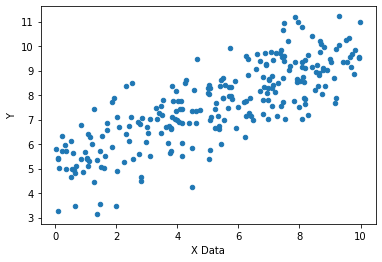

In [18]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y='Y')

In [19]:
batch_size = 10

In [20]:
m = tf.Variable(0.81)
b = tf.Variable(-0.17)

In [21]:
xph = tf.placeholder(tf.float32, [batch_size])

In [22]:
yph = tf.placeholder(tf.float32, [batch_size])

In [23]:
y_model = m*xph + b

In [24]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [26]:
init = tf.global_variables_initializer()

In [27]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])
        

In [28]:
model_m

0.50976956

In [29]:
model_b

4.9269733

In [30]:
y_hat = x_data*model_m+model_b

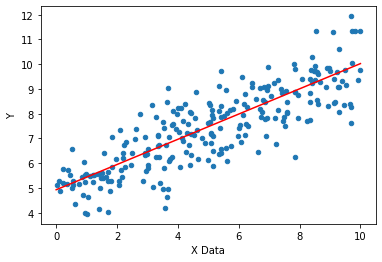

In [31]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

# TF ESTIMATOR

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [33]:
feat_cols = [tf.feature_column.numeric_column('X',shape=[1])]

In [57]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\feres\\AppData\\Local\\Temp\\tmp5qcf2m9w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000210717E3668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
from sklearn.model_selection import train_test_split

In [44]:
input_func = tf.estimator.inputs.numpy_input_fn({'X':x_train},
                                                 y_train,
                                                 batch_size=8,
                                                 num_epochs=None,
                                                 shuffle=True)

In [52]:
print(x_train.shape)
print(x_eval.shape)

(700000,)
(300000,)


In [53]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true, 
                                                   test_size=0.3,
                                                   random_state=101)

In [54]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'X':x_train},
                                                 y_train,
                                                 batch_size=8,
                                                 num_epochs=1000,
                                                 shuffle=False)

In [55]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'X':x_eval},
                                                 y_eval,
                                                 batch_size=8,
                                                 num_epochs=1000,
                                                 shuffle=False)

In [59]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: in converted code:
    relative to C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\feature_column:

    feature_column_v2.py:704 call
        return self.layer(features)
    feature_column_v2.py:565 call
        weight_var=weight_var)
    feature_column_v2.py:2365 _create_weighted_sum
        weight_var=weight_var)
    feature_column_v2.py:2371 _create_dense_column_weighted_sum
        tensor = column.get_dense_tensor(transformation_cache, state_manager)
    feature_column_v2.py:2799 get_dense_tensor
        return transformation_cache.get(self, state_manager)
    feature_column_v2.py:2562 get
        transformed = column.transform_feature(self, state_manager)
    feature_column_v2.py:2771 transform_feature
        input_tensor = transformation_cache.get(self.key, state_manager)
    feature_column_v2.py:2554 get
        raise ValueError('Feature {} is not in features dictionary.'.format(key))

    ValueError: Feature X is not in features dictionary.


In [48]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Could not find trained model in model_dir: C:\Users\feres\AppData\Local\Temp\tmprguvrlmd, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.


ValueError: in converted code:
    relative to C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\feature_column:

    feature_column_v2.py:704 call
        return self.layer(features)
    feature_column_v2.py:565 call
        weight_var=weight_var)
    feature_column_v2.py:2365 _create_weighted_sum
        weight_var=weight_var)
    feature_column_v2.py:2371 _create_dense_column_weighted_sum
        tensor = column.get_dense_tensor(transformation_cache, state_manager)
    feature_column_v2.py:2799 get_dense_tensor
        return transformation_cache.get(self, state_manager)
    feature_column_v2.py:2562 get
        transformed = column.transform_feature(self, state_manager)
    feature_column_v2.py:2771 transform_feature
        input_tensor = transformation_cache.get(self.key, state_manager)
    feature_column_v2.py:2554 get
        raise ValueError('Feature {} is not in features dictionary.'.format(key))

    ValueError: Feature X is not in features dictionary.


In [58]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Could not find trained model in model_dir: C:\Users\feres\AppData\Local\Temp\tmp5qcf2m9w, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-27T12:27:23Z
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/100